In [ ]:
# Read the contents of the 'penguins.csv' file
penguins_df = pd.read_csv('penguins.csv')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
penguins_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Q2.1 Preprocessing and cleaning the dataset

# Handle missing data
# Drop rows with missing values
penguins_df.dropna(inplace=True)

# Deal with irregular data (outliers)
# Detect outliers using visualization or statistical methods
# Remove outliers if necessary

# Remove unnecessary data columns
# For simplicity, we assume all columns are necessary for the classification task

# Encode categorical data
label_encoder = LabelEncoder()
penguins_df['species_encoded'] = label_encoder.fit_transform(penguins_df['species'])
penguins_df['island_encoded'] = label_encoder.fit_transform(penguins_df['island'])
penguins_df['sex_encoded'] = label_encoder.fit_transform(penguins_df['sex'])

penguins_df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_encoded,island_encoded,sex_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,2,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,2,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,2,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,2,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,2,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,2,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,2,0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,2,0,0


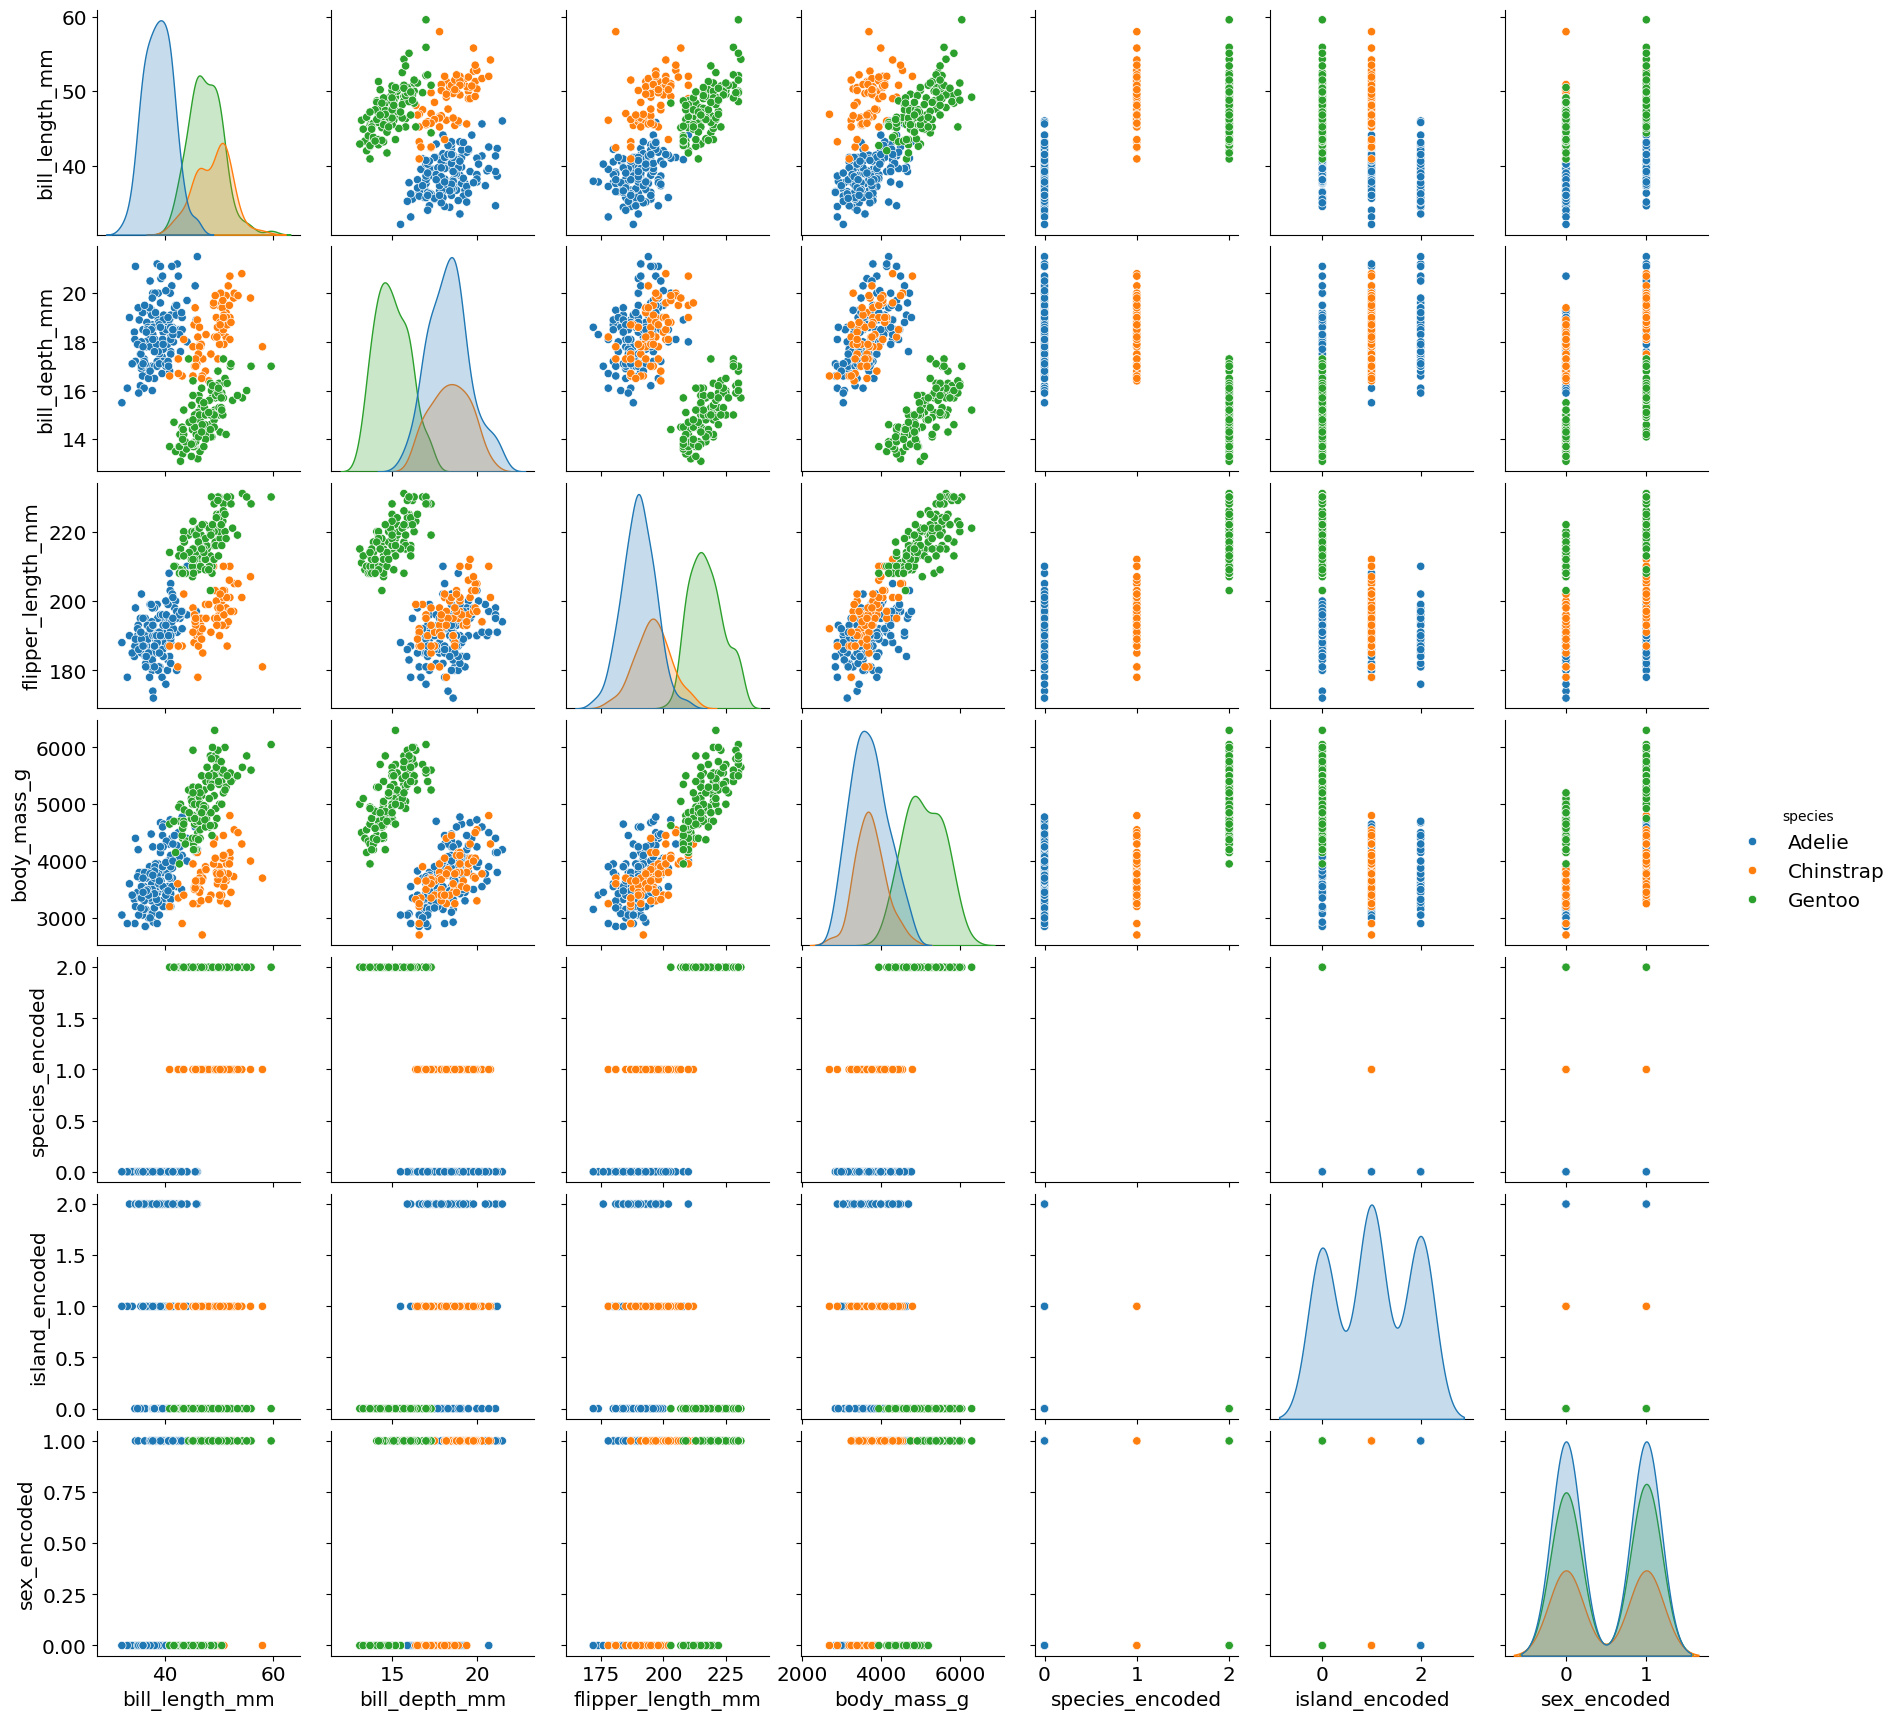

In [ ]:
# Q2.2 Visualize the dataset
# Visualize dataset characteristics using various plots
sns.pairplot(penguins_df, hue='species')
plt.show()

Q2.3 Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability.


Based on the pairplot visualization of the penguin dataset, several key observations emerge:

- Strong correlations exist between bill length and bill depth, suggesting a relationship between these features.
- Distinct clusters are apparent for different penguin species, indicating characteristic feature combinations.
- Flipper length distributions vary across species, potentially aiding in species differentiation.
- Body mass displays notable variability among species, highlighting diversity in size.
- Outliers are identifiable and may warrant further investigation.
In summary, the pairplot provides insights into feature relationships, species differentiation, and variability within the penguin dataset, offering a foundation for further analysis and modeling.

In [ ]:

# Q2.4 Build a classification model using Logistic Regression
# Split the dataset into features (X) and target variable (y)
X = penguins_df[['island_encoded', 'bill_length_mm', 'bill_depth_mm',
                 'flipper_length_mm', 'body_mass_g', 'sex_encoded']]
y = penguins_df['species_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_model

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Q2.5 Evaluate and discuss the model performance

# Evaluate the model's performance on the testing data
y_pred = logistic_regression_model.predict(X_test)
y_pred

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0])

In [ ]:
# Calculate evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]


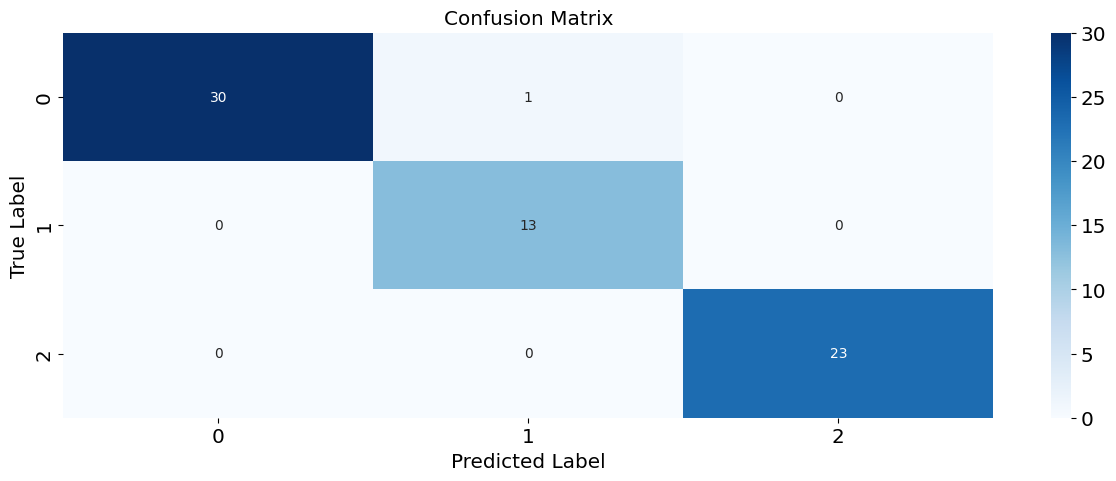

In [ ]:
# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Discuss model performance and potential improvements

Based on the provided classification report and confusion matrix, the model exhibits strong performance in classifying data into three classes. With high precision, recall, and F1-scores across all classes, particularly achieving perfect precision, recall, and F1-score for class 2, the model demonstrates robustness in predicting class labels. The overall accuracy of 0.99 suggests the model's effectiveness in making correct predictions across all classes. Minimal misclassifications, as shown in the confusion matrix, further support the model's reliability. To further enhance performance, potential improvements include addressing class imbalances, fine-tuning hyperparameters, exploring additional features, and experimenting with alternative classification algorithms. Overall, the model's current performance is commendable.